# Titanic


Here I will analysing the Titanic disaster, using Python, including Pandas, NumPy, Sci-kit Learn libraries.
Dataset was takken from Kaggle competition, you can find it by following the link 'https://www.kaggle.com/c/titanic/overview'
According the data discription, collumns SibSp contains value of of siblings / spouses aboard the Titanic, parch contains value of parents / children aboard the Titanic. The Embarked column discibes the Port of Embarkation. At first sight, I`m not sure that place, where you come aboard the ship, can impact your safety. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Train dataset

In [2]:
data = pd.read_csv('./train.csv')
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
330,331,1,3,"McCoy, Miss. Agnes",female,NaN,2,0,367226,23.250,NaN,Q
354,355,0,3,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.225,NaN,C
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.600,NaN,C
228,229,0,2,"Fahlstrom, Mr. Arne Jonas",male,18.0,0,0,236171,13.000,NaN,S
659,660,0,1,"Newell, Mr. Arthur Webster",male,58.0,0,2,35273,113.275,D48,C


In [3]:
data.shape

(891, 12)

It will be good to present all the NaNs in convient form

In [4]:
isna_train = pd.DataFrame(data.isna().sum(), columns=['NaN`s'])
nan_pct_train = pd.DataFrame(data.isna().mean() * 100, columns=['percent of total'])
nan_pct_df = pd.concat([isna_train, nan_pct_train], axis=1)
nan_pct_df

,NaN`s,percent of total
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


## Cabin
Cabin column has a very big amount of NaNs, it can be dropped

In [5]:
data.drop(columns='Cabin' ,inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Embarked

At the abstract I said I`m not sure Embarked feature affects the survival rates, and now we can take a look on it.

In [6]:
data[['Embarked', 'Survived']].groupby(by='Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


My assumption was wrong, the "C" port has the best survival rates compare to the others

In [7]:
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


The both persons from unknown Embarked port are female and survived. They have the same ticket number, but they are not relatives. That means they probably was living in one cabin

In [8]:
data['Embarked'].fillna('C', inplace=True)

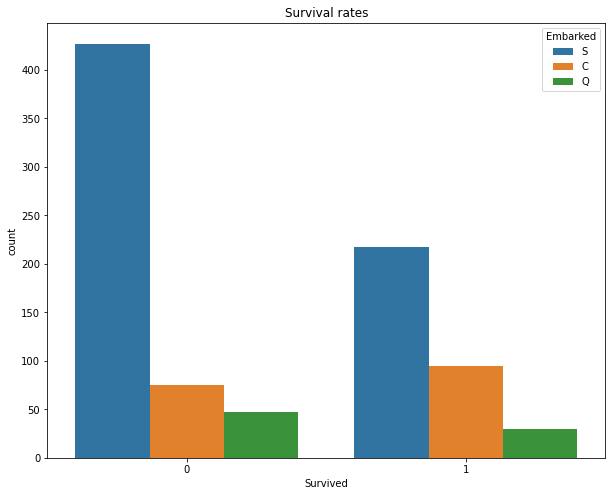

In [9]:
fig = plt.figure(figsize=(10, 8))
sns.countplot(data=data, x='Survived', hue='Embarked')
plt.title("Survival rates")
plt.show()

# Sex

In [10]:
data['Sex'].value_counts(), data[data['Survived'] == 1][['Sex']].value_counts()

(male      577
 female    314
 Name: Sex, dtype: int64,
 Sex   
 female    233
 male      109
 dtype: int64)

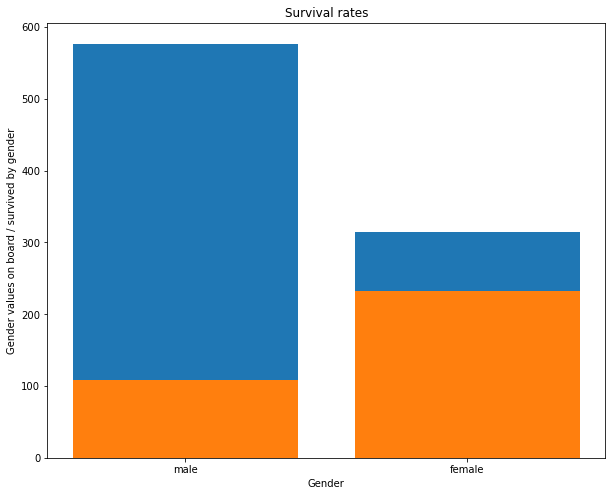

In [11]:
plt.figure(figsize=(10, 8))
rect1 = plt.bar(['male', 'female'], data['Sex'].value_counts())
rect2 = plt.bar((['female', 'male']), data['Sex'][data['Survived'] == 1].value_counts())
plt.ylabel('Gender values on board / survived by gender')
plt.xlabel('Gender')
plt.title('Survival rates')
plt.show()

## Adding 'Alone' feature

For better 'Age' feature analyzis I am adding new categorial feature. It separate passengers to two groups travelling alone and with families.

In [12]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
data.loc[(data['SibSp'] == 0) & (data['Parch'] == 0), 'Alone'] = 1
data.loc[(data['SibSp'] != 0) | (data['Parch'] != 0), 'Alone'] = 0
data.Alone.astype('int')

0      0
1      0
2      1
3      0
4      1
      ..
886    1
887    1
888    0
889    1
890    1
Name: Alone, Length: 891, dtype: int32

## Age

Let`s fill the NaN of the Age column. 
If person was alone on board, I will fill NaNs with mean age of solo-travellers. 
For families I will take the dependence of age with respect to age bins

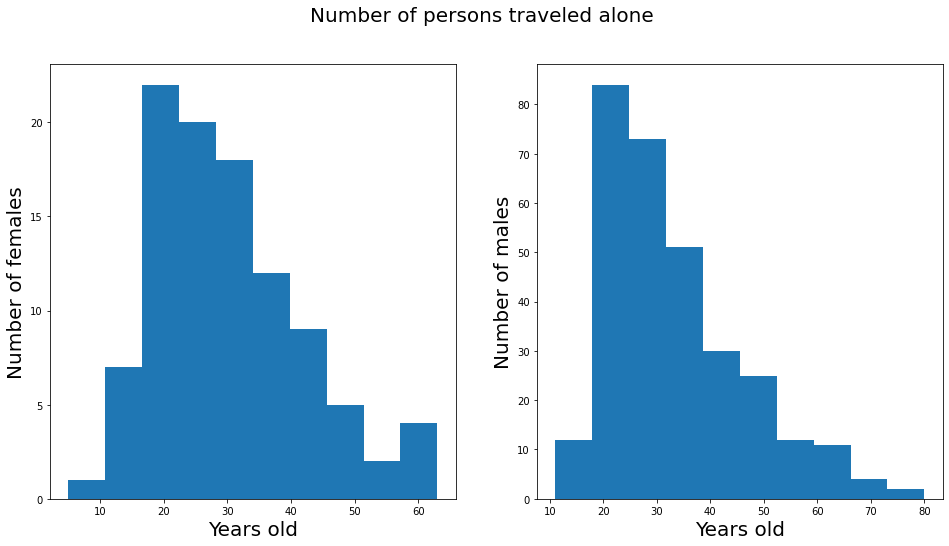

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Number of persons traveled alone', size=20)

(data[(data['Sex'] == 'female') & (data['Alone'] == 1)].Age).plot(kind='hist', ax=ax[0])
(data[(data['Sex'] == 'male') & (data['Alone'] == 1)].Age).plot(kind='hist', ax=ax[1])
ax[0].set_xlabel('Years old', fontsize=20)
ax[1].set_xlabel('Years old', fontsize=20)
ax[0].set_ylabel('Number of females', fontsize=20)
ax[1].set_ylabel('Number of males', fontsize=20)
plt.show()

In [15]:
data[data['Alone'] == 1][['Sex', 'Age']].groupby(by='Sex').median()

,Age
Sex,
female,28.5
male,30.0


In [16]:
data.loc[data.Age.isnull() & (data['Alone'] == 1) & (data['Sex'] == 'female'), 'Age'] = np.round(data[(data['Sex'] == 'female') & (data['Alone'] == 1)].Age.median())
data.loc[data.Age.isnull() & (data['Alone'] == 1) & (data['Sex'] == 'male'), 'Age'] = np.round(data[(data['Sex'] == 'male') & (data['Alone'] == 1)].Age.median())                                                     

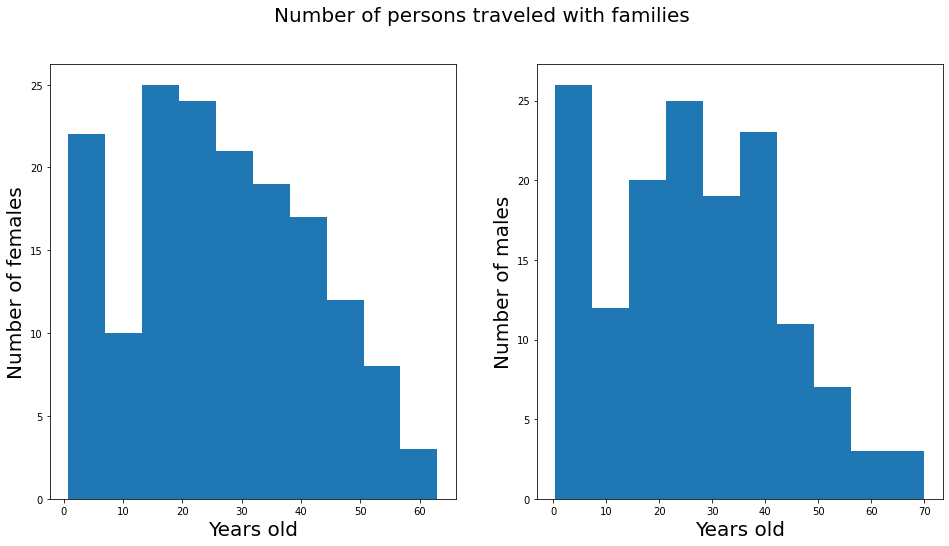

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Number of persons traveled with families', size=20)

(data[(data['Sex'] == 'female') & (data['Alone'] == 0)].Age).plot(kind='hist', ax=ax[0])
(data[(data['Sex'] == 'male') & (data['Alone'] == 0)].Age).plot(kind='hist', ax=ax[1])
ax[0].set_xlabel('Years old', fontsize=20)
ax[1].set_xlabel('Years old', fontsize=20)
ax[0].set_ylabel('Number of females', fontsize=20)
ax[1].set_ylabel('Number of males', fontsize=20)
plt.show()

It can be clearly seen that big part of persons on board of Titanic who was trevelling with families are childrens. A lot of men like Jack was travelling alone, probably on the way to the new life.


In [18]:
cdata = data.copy()
bins = [-1, 15, 25, 35, 45, 70]
cdata['Family_ages'] = pd.cut(data[data['Alone'] == 0].Age, bins=bins, labels=range(5))
median = np.round(cdata.groupby('Family_ages').Age.median())
median

Family_ages
0     4.0
1    21.0
2    30.0
3    40.0
4    52.0
Name: Age, dtype: float64

In [19]:
x = np.round(cdata[cdata.Age.isnull()].shape[0] / (len(bins) - 1)).astype('int')
for i in range(len(median)):
    cdata.loc[cdata[cdata.Age.isnull()].index[0: x], 'Age'] = median[i]
data['Age'] = cdata['Age']

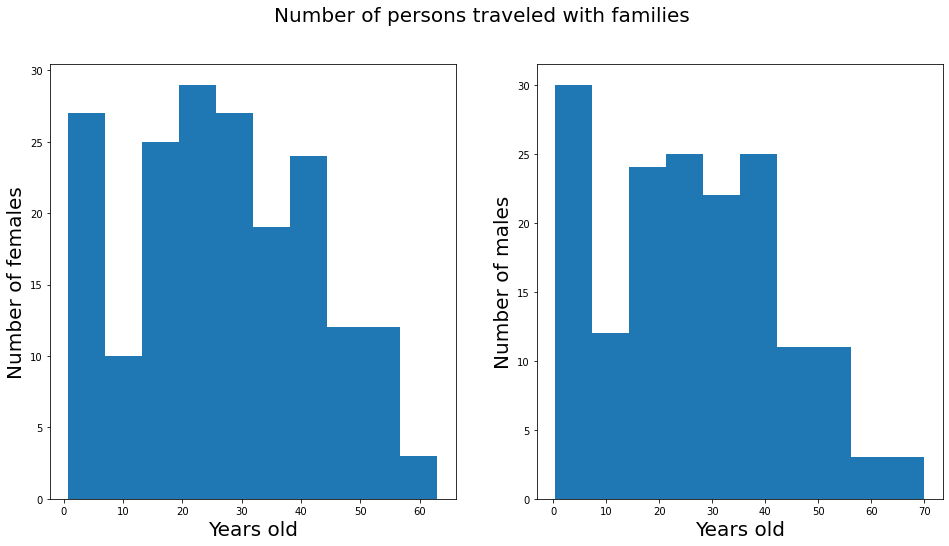

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Number of persons traveled with families', size=20)

(data[(data['Sex'] == 'female') & (data['Alone'] == 0)].Age).plot(kind='hist', ax=ax[0])
(data[(data['Sex'] == 'male') & (data['Alone'] == 0)].Age).plot(kind='hist', ax=ax[1])
ax[0].set_xlabel('Years old', fontsize=20)
ax[1].set_xlabel('Years old', fontsize=20)
ax[0].set_ylabel('Number of females', fontsize=20)
ax[1].set_ylabel('Number of males', fontsize=20)
plt.show()

## Pclass

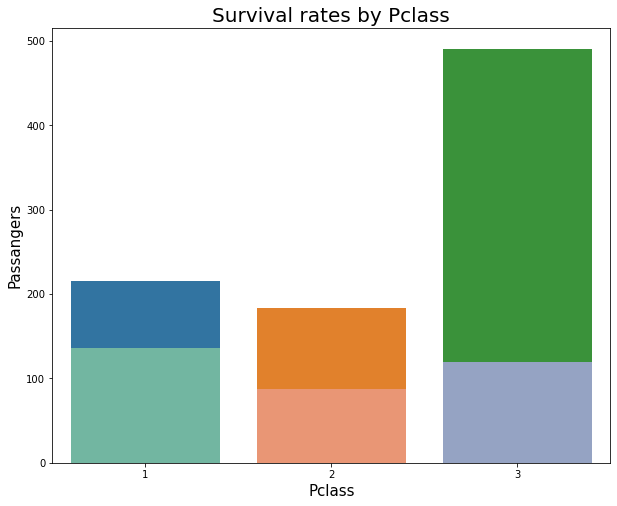

In [21]:
plt.figure(figsize=(10, 8))

ax = sns.countplot(x='Pclass', data=data)
ax2 = sns.countplot(x='Pclass', data=data[data['Survived'] == 1][['Pclass']], palette="Set2")

plt.title('Survival rates by Pclass', size=20)
plt.ylabel('Passangers', size=15)
plt.xlabel('Pclass', size=15)
plt.show()

## Fare

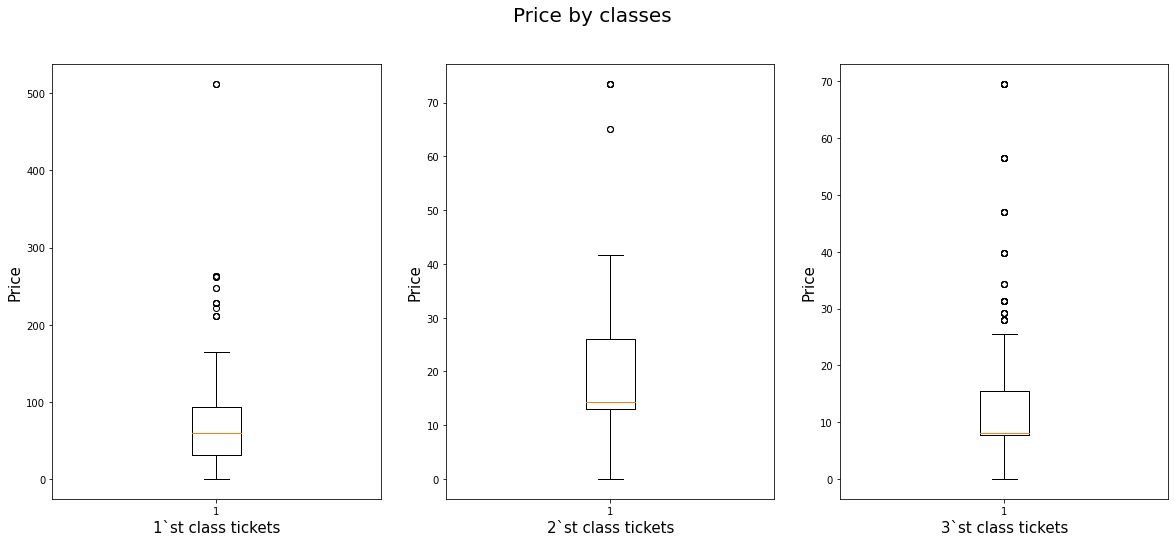

In [22]:
fig = plt.figure(figsize=(20, 8))
fig.suptitle('Price by classes', size=20)

ax = None
for i, pclass in enumerate(sorted(list(set(data['Pclass'].values)))):
    ax = plt.subplot(1, 3, i + 1)
    plt.boxplot(data[data['Pclass'] == pclass].Fare, widths=0.15)
    plt.xlabel('{}`st class tickets'.format(pclass), size=15)
    plt.ylabel('Price', size=15)

plt.show()

In [23]:
data[data['Pclass'] == 3][['Fare']].max()

Fare    69.55
dtype: float64

In [24]:
data[data['Fare'] == 69.55]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Alone
159,160,0,3,"Sage, Master. Thomas Henry",male,4.0,8,2,CA. 2343,69.55,S,0.0
180,181,0,3,"Sage, Miss. Constance Gladys",female,21.0,8,2,CA. 2343,69.55,S,0.0
201,202,0,3,"Sage, Mr. Frederick",male,21.0,8,2,CA. 2343,69.55,S,0.0
324,325,0,3,"Sage, Mr. George John Jr",male,30.0,8,2,CA. 2343,69.55,S,0.0
792,793,0,3,"Sage, Miss. Stella Anna",female,52.0,8,2,CA. 2343,69.55,S,0.0
846,847,0,3,"Sage, Mr. Douglas Bullen",male,52.0,8,2,CA. 2343,69.55,S,0.0
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,52.0,8,2,CA. 2343,69.55,S,0.0


## Test dataset

In [25]:
test = pd.read_csv('./test.csv')
test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
15,907,2,"del Carlo, Mrs. Sebastiano (Argenia Genovesi)",female,24.0,1,0,SC/PARIS 2167,27.7208,NaN,C
331,1223,1,"Dulles, Mr. William Crothers",male,39.0,0,0,PC 17580,29.7000,A18,C
18,910,3,"Ilmakangas, Miss. Ida Livija",female,27.0,1,0,STON/O2. 3101270,7.9250,NaN,S
20,912,1,"Rothschild, Mr. Martin",male,55.0,1,0,PC 17603,59.4000,NaN,C
369,1261,2,"Pallas y Castello, Mr. Emilio",male,29.0,0,0,SC/PARIS 2147,13.8583,NaN,C


In [26]:
test.shape

(418, 11)

In [27]:
isna_test = pd.DataFrame(test.isna().sum(), columns=['NaN`s'])
nan_pct_test = pd.DataFrame(test.isna().mean() * 100, columns=['percent of total'])
nan_pct_df2 = pd.concat([isna_test, nan_pct_test], axis=1)
nan_pct_df2

,NaN`s,percent of total
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,86,20.574163
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,1,0.239234
Cabin,327,78.229665


## Cabin

In [28]:
test.drop(columns='Cabin', inplace=True)

## Fare

In [29]:
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [30]:
test.loc[test.Fare.isnull(), 'Fare'] = test[test['Pclass'] == 3].Fare.median()

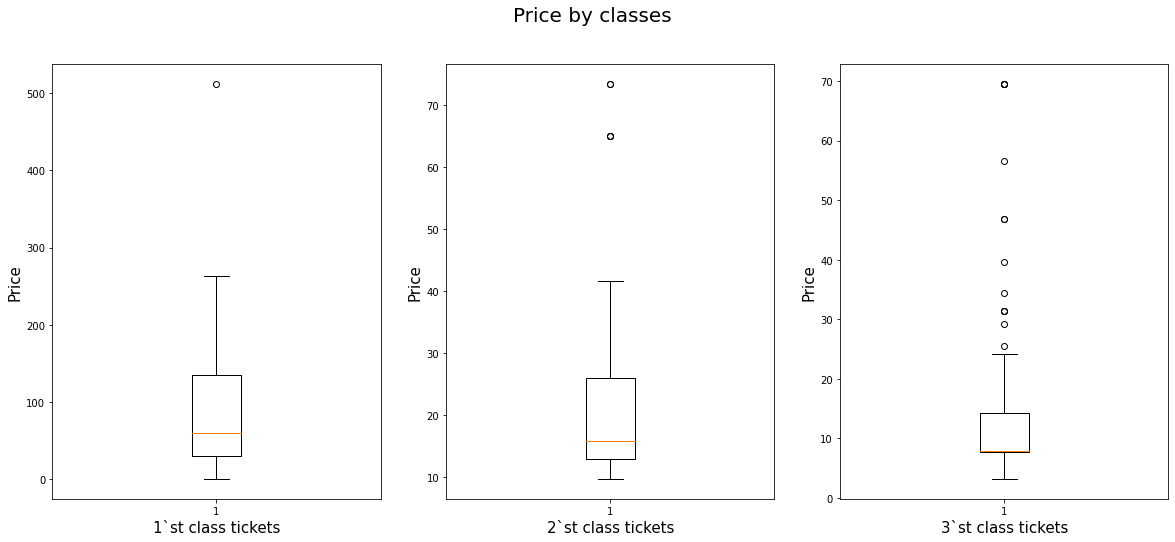

In [31]:
fig = plt.figure(figsize=(20, 8))
fig.suptitle('Price by classes', size=20)

ax = None
for i, pclass in enumerate(sorted(list(set(test['Pclass'].values)))):
    ax = plt.subplot(1, 3, i + 1)
    plt.boxplot(test[test['Pclass'] == pclass].Fare, widths=0.15)
    plt.xlabel('{}`st class tickets'.format(pclass), size=15)
    plt.ylabel('Price', size=15)

plt.show()

## Adding 'Alone' feature

In [34]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [46]:
test.loc[(test['SibSp'] == 0) & (test['Parch'] == 0), 'Alone'] = 1
test.loc[(test['SibSp'] != 0) | (test['Parch'] != 0), 'Alone'] = 0
test.Alone.astype('int')

0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    1
415    1
416    1
417    0
Name: Alone, Length: 418, dtype: int32

## Age

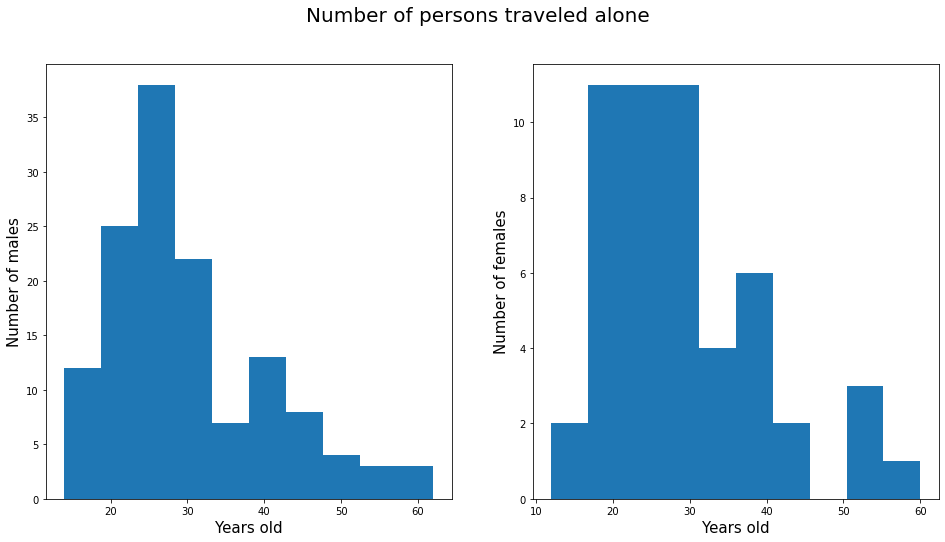

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))
plt.suptitle('Number of persons traveled alone', size=20)

(test[(test['Sex'] == 'male') & (test['Alone'] == 1)].Age).plot(kind='hist', ax=ax[0])
(test[(test['Sex'] == 'female') & (test['Alone'] == 1)].Age).plot(kind='hist', ax=ax[1])

ax[0].set_ylabel('Number of males', size=15)
ax[1].set_ylabel('Number of females', size=15)
ax[0].set_xlabel('Years old', size=15)
ax[1].set_xlabel('Years old', size=15)

plt.show()

In [58]:
test[test['Alone'] == 1][['Sex', 'Age']].groupby(by='Sex').median()

,Age
Sex,
female,28.0
male,27.0


In [68]:
test[(test['Alone'] == 1) & (test['Sex'] == 'male')].Age.median()

27.0

In [69]:
test.loc[(test['Sex'] == 'male') & (test['Alone'] == 1) & test.Age.isnull(), 'Age'] = test[(test['Alone'] == 1) & (test['Sex'] == 'male')].Age.median()
test.loc[(test['Sex'] == 'female') & (test['Alone'] == 1) & test.Age.isnull(), 'Age'] = test[(test['Alone'] == 1) & (test['Sex'] == 'female')].Age.median()

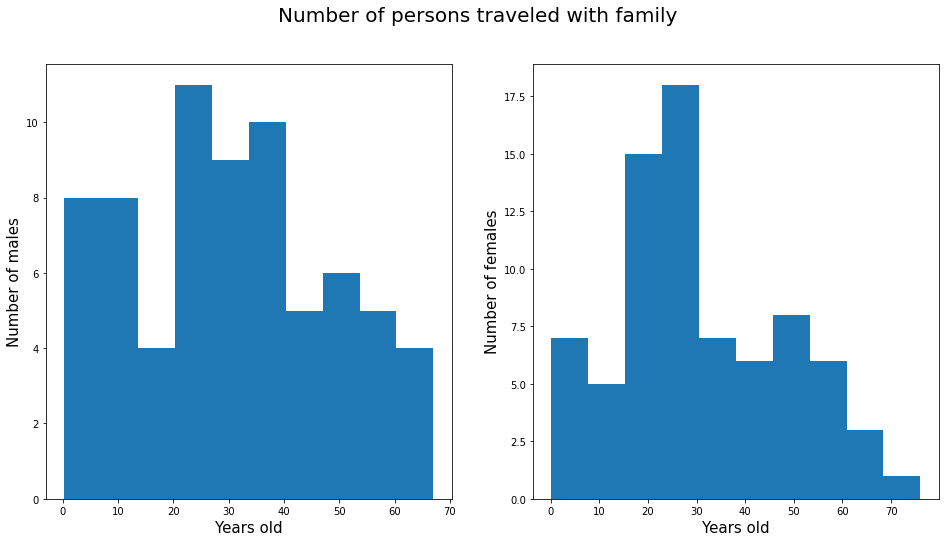

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))
plt.suptitle('Number of persons traveled with family', size=20)

(test[(test['Sex'] == 'male') & (test['Alone'] == 0)].Age).plot(kind='hist', ax=ax[0])
(test[(test['Sex'] == 'female') & (test['Alone'] == 0)].Age).plot(kind='hist', ax=ax[1])

ax[0].set_ylabel('Number of males', size=15)
ax[1].set_ylabel('Number of females', size=15)
ax[0].set_xlabel('Years old', size=15)
ax[1].set_xlabel('Years old', size=15)

plt.show()

Need to make bins for families